# Linear phase relationship for filters

### 1. What does linear phase in filters mean?
<br>
A filter's role is to perform an arbitrary operation or process on any given input, to produce some desired output. Likewise, a linear phase filter performs a similar operation on, for example a harmonic excitation, where any input frequency will experience a phase shift that is proportional to the magnitude of said frequency. This relationship will be valid for all frequencies present within the input excitation.
<br>

**Key point to remember:** The benefit of having a linear phase filter is that it preserves the shape of the input signal after filtering.

In [1]:
# Import all relevant modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import scipy.signal as sig
plt.style.use('classic')

To observe how linear phase relation works, we begin with defining a simple function to generate an output sine wave of the form 
<br>
\begin{equation}
y = Asin(2\pi ft + \phi)
\end{equation}

In [2]:
# Function definition
def generateSinusoid(A, f, T, phi=0, Fs=4096):
    sampling_interval = 1 / Fs
    t = np.arange(0, T, sampling_interval)
    y = A * np.sin(2 * np.pi * f * t + phi)
    return y, t

Here, the test signal $y$ will be the sum of two sine waves $x_1$ and $x_2$.<br> Let $x_1 = sin(2\pi f_1t + \phi_1)$ and $x_2 = sin(2\pi f_2t + \phi_2)$, with $f_2 = 2f_1$ 

We shall simulate the phase shift from some filtering operation. The filter's design is not necessary here, only its effect on phase relationship is shown.
<br><br>
Consider a few cases:
<br><br>
**Case 1**: $\phi_1 = \phi_2 = 0$ 

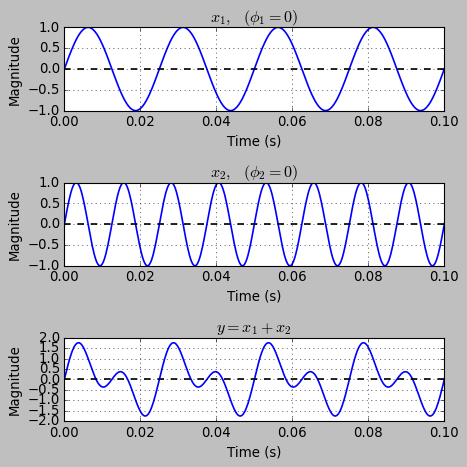

In [3]:
# Generate two signals frequencies 40 Hz and 80 Hz with zero intial phase each and of duration 1 second.
f1 = 40  # Hz
f2 = 80  # Hz
T = 1     # s

x1, t1 = generateSinusoid(1, f1, T)
x2, _ = generateSinusoid(1, f2, T)

# Sum the two signals
y_case_1 = x1 + x2

"""
Plotting
"""
lw = 1.5
fig_titles = [r'$x_1,$  $(\phi_1 = 0)$', r'$x_2,$  $(\phi_2 = 0)$', r'$y = x_1 + x_2$']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6,6))
ax[0].plot(t1, x1, linewidth=lw)
ax[1].plot(t1, x2, linewidth=lw)
ax[2].plot(t1, y_case_1, linewidth=lw)

for i in range(0, 3):
    ax[i].set_ylabel('Magnitude')
    ax[i].set_title(fig_titles[i])
    ax[i].axhline(0, color='k', linestyle='--', linewidth=lw)
    ax[i].set_xlim(0, t1[-1])
    ax[i].set_xlabel('Time (s)')
    ax[i].set_xlim([0, 1/10])  # Plot waveform up to 100 ms
    ax[i].grid(which='both')

fig.tight_layout()

All inputs and outputs start at the same time. The shape of the output is as per interference of the two inputs, with no phase delays.
<br><br>
**Case 2**: $\phi_1 = \dfrac{\pi}{3}, \phi_2 = 0$ 

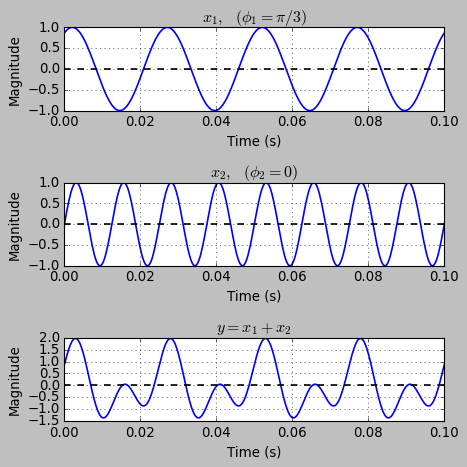

In [4]:
# Add phase shift to one of the input sinusoids
x1, t1 = generateSinusoid(1, f1, T, np.pi / 3)
x2, _ = generateSinusoid(1, f2, T)

# Sum the two signals again
y_case_2 = x1 + x2

"""
Plotting
"""
lw = 1.5
fig_titles = [r'$x_1,$  $(\phi_1 = {\pi}/{3})$', r'$x_2,$  $(\phi_2 = 0)$', r'$y = x_1 + x_2$']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6,6))
ax[0].plot(t1, x1, linewidth=lw)
ax[1].plot(t1, x2, linewidth=lw)
ax[2].plot(t1, y_case_2, linewidth=lw)

for i in range(0, 3):
    ax[i].set_ylabel('Magnitude')
    ax[i].set_title(fig_titles[i])
    ax[i].axhline(0, color='k', linestyle='--', linewidth=lw)
    ax[i].set_xlim(0, t1[-1])
    ax[i].set_xlabel('Time (s)')
    ax[i].set_xlim([0, 1/10])  # Plot waveform up to 100 ms
    ax[i].grid(which='both')

fig.tight_layout()

Here, we observe that the shape of the output waveform has changed and is no longer the same as that of **Case 1**.
<br><br>
**Case 3**: $\phi_1 = \dfrac{\pi}{3}, \phi_2 = \dfrac{2\pi}{3}$ 

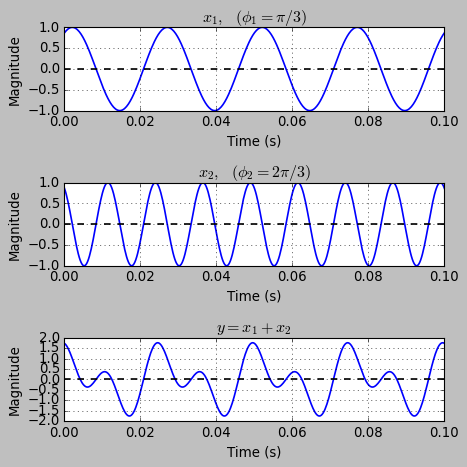

In [5]:
# Add a propotional phase shift to the remaining sinusoid
x1, t1 = generateSinusoid(1, f1, T, np.pi / 3)
x2, _ = generateSinusoid(1, f2, T, 2 * np.pi / 3)

# Sum the two signals again
y_case_3 = x1 + x2

"""
Plotting
"""
lw = 1.5
fig_titles = [r'$x_1,$  $(\phi_1 = {\pi}/{3})$', r'$x_2,$  $(\phi_2 = {2\pi}/{3})$', r'$y = x_1 + x_2$']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6,6))
ax[0].plot(t1, x1, linewidth=lw)
ax[1].plot(t1, x2, linewidth=lw)
ax[2].plot(t1, y_case_3, linewidth=lw)

for i in range(0, 3):
    ax[i].set_ylabel('Magnitude')
    ax[i].set_title(fig_titles[i])
    ax[i].axhline(0, color='k', linestyle='--', linewidth=lw)
    ax[i].set_xlim(0, t1[-1])
    ax[i].set_xlabel('Time (s)')
    ax[i].set_xlim([0, 1/10])  # Plot waveform up to 100 ms
    ax[i].grid(which='both')

fig.tight_layout()

Here, we once again observe that the shape of the output waveform is *identical* to that of **Case 1**, besides the obvious delay in time. This is because $\phi_2$ was proportionally or linearly scaled with frequency (here, $\phi_2 = 2\phi_1$), based on the relation between $f_1$ and $f_2$.
<br><br>
**<p style="color:green">In fact, it can be generalized that for any input sinusoid between the interval $[f_1, f_2]$, a linear phase filter will impart a proportional phase shift to it, in a manner which ensures that the output waveform will maintain the original input's waveform.</p>**

### 2. Difference equation for LTI systems and system transfer functions
The output $y[n]$ of a system in discrete time domain is the convolution sum of the system's impulse response $h[n]$ and the input sequence $x[n]$.

\begin{equation}
y[n] = h[n] * x[n],
\label{eq: convolution sum}
\end{equation}
where $*$ is the convolution sum.

In frequency domain, the output spectrum $Y[\omega]$ is the product of system transfer function $H[\omega]$ and input spectrum $X[\omega]$.

\begin{equation}
Y[\omega] = H[\omega]\cdot X[\omega],
\end{equation}

wherein an $N$-point DFT representation, $\omega = \dfrac{2\pi k}{N}$ with $k=0,1,2,...N-1, N$.

Likewise, discrete linear time invariant (LTI) systems can be described using the following difference equation:
\begin{equation}
\sum^{\color{red}{A}}_{m = 0}\color{red}{a_m}y[n-m] = \sum^{\color{blue}{B}}_{m = 0}\color{blue}{b_m}x[n-m]
\label{eq: DE}
\end{equation}

where,<br>
$\color{red}{A}$ and $\color{blue}B$ are the total number of recursive (feedback) and non-recursive (feedforward) coefficients,<br>
$\color{red}{a_m}$ and $\color{blue}{b_m}$ are the said m$^\text{th}$ coefficients,<br>
$y[n]$ and $x[n]$ are the output and input of the system, respectively.

#### 2.1. From Difference equations to Frequency responses
If an input to an LTI system is a complex sinusoid, $x[n] = Ae^{j\omega n}$, then the output $y[n]$ is obtained using $\eqref{eq: convolution sum}$ as follows:

\begin{align*}
y[n] &= h[n] * x[n]\\
&= \sum^{\infty}_{m = -\infty}h[m]x[n-m]\\
&= \sum^{\infty}_{m = -\infty}h[m]Ae^{j\omega (n-m)}\\
&= A\sum^{\infty}_{m = -\infty}h[m]e^{j\omega n}e^{-j\omega m}\\
&= Ae^{j\omega n}\sum^{\infty}_{m = -\infty}h[m]e^{-j\omega m}\\
&= x[n]H(\omega)\\
\label{eq: DE DTFT}
\end{align*}

where $H(\omega)$ is the DTFT of the system, which can easily be discretized into its DFT equivalent on computers.

Let $A=1$ for the complex sinusoid input to the LTI system. Therefore $y[n] = H(\omega)e^{j\omega n}$. Furthermore, by evaluating the summation in $\eqref{eq: DE}$ as we did in $\eqref{eq: DE DTFT}$, we obtain

\begin{align}
\sum^{\color{red}{A}}_{m = 0}\color{red}{a_m}y[n-m] &= \sum^{\color{blue}{B}}_{m = 0}\color{blue}{b_m}x[n-m]\\
%
\sum^{\color{red}{A}}_{m = 0}\color{red}{a_m}x[n-m]H(\omega) &= \sum^{\color{blue}{B}}_{m = 0}\color{blue}{b_m}e^{j\omega (n-m)}\\
%
\sum^{\color{red}{A}}_{m = 0}\color{red}{a_m}e^{j\omega (n-m)}H(\omega) &= \sum^{\color{blue}{B}}_{m = 0}\color{blue}{b_m}e^{j\omega (n-m)}\\
%
\sum^{\color{red}{A}}_{m = 0}\color{red}{a_m}e^{-j\omega m}H(\omega) &= \sum^{\color{blue}{B}}_{m = 0}\color{blue}{b_m}e^{-j\omega m}\\
%
H(\omega) &= \dfrac{\sum^{\color{blue}{B}}_{m = 0}\color{blue}{b_m}e^{-j\omega m}}{\sum^{\color{red}{A}}_{m = 0}\color{red}{a_m}e^{-j\omega m}}\\
%
H(\omega) &= \dfrac{\text{FT.{$\color{blue}{b_m}$}}}{\text{FT.{$\color{red}{a_m}$}}}
%
\label{eq: FR}\tag{6}
\end{align}

Filters can thereby be designed by identifying appropriate values of $\color{red}{A}$ and $\color{blue}{B}$, and deriving the respective sets of {$\color{red}{a_m}$} and {$\color{blue}{b_m}$} coefficients.

**Key point to remember:** The frequency response $H[\omega]$ of any filter (or the system transfer function itself) can be computed by dividing the $N$-point FFT of the feedforward array of coefficients by the $N$-point FFT of the feedback array of coefficients, from the difference equation describing the said system.

In [6]:
"""
Note:
The SciPy module's inbuilt scipy.signal.freqz(b, a, Nf) also works similarly.
The method returns the above outputs in the reverse order: omega, H_k

For longer filters, FFT approach is always faster than direct polynomial implementation
"""
# Function to calculate frequency response of a filter or system
def calcFreqResponse(b, a, Nf):
    k = np.arange(0, Nf)            # discrete frequency bin number
    omega = 2 * np.pi * k / Nf      # discrete frequency bins in rad/s
    H_k = fft(b, Nf) / fft(a, Nf)   # frequency response of filter using N-point FFTs
    return H_k, omega

#### 2.2. FIR Filters
Finite impulse response filters are characterized by having impulse responses that are finite length sequences. FIR filters by definition have no memory elements: there are no feedback terms or recursion coefficients ($\color{red}{A} = 0$, $\color{red}{a_0} = 1$). A system describing an FIR filter operation is expressed as,
\begin{align}
y[n] &= \sum^{\color{blue}{B}}_{m = 0}\color{blue}{b_m}x[n-m]\\
&= \color{blue}{b_0}x[0] + \color{blue}{b_1}x[1] + ... +\color{blue}{b_{B-1}}x[\color{blue}{B}-1] + \color{blue}{b_B}x[\color{blue}{B}].
\end{align}
Here, assuming initial rest conditions,<br>
1. The FIR filter is of order $\color{blue}{B}$.<br>
2. The impulse response $h[n]$ is of length $\color{blue}{B}+1$.<br>
3. The impulse response is composed of feedforward filter coefficients, $h[n] = [\color{blue}{b_0}, \color{blue}{b_1},..., \color{blue}{b_B}]$

**FIR example:** Implement a $L$-point moving average filter and visualize its frequency response. Let $L=5$ be the total length of impulse response.

In this example,
1. Filter order is $\color{blue}{B} = L - 1 = 4$ 
2. If $L=5$, the feedforward filter coefficients are $\dfrac{1}{L}$ each. Thus, {$\color{blue}{b_m}$} = $[0.2, 0.2, 0.2, 0.2, 0.2]$.
3. $\color{red}{a_0} = 1$
4. All samples contribute equally.

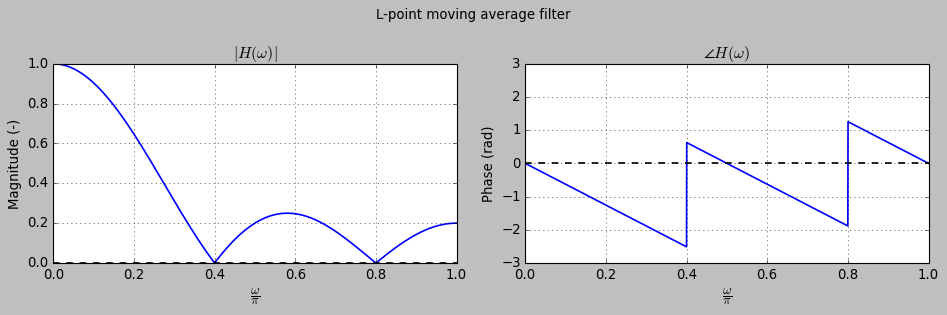

In [7]:
# Compute and visualize frequency response of L-point moving average filter

def filt_FIRMA(L):
    b = []  # create empty list of feedforward coefficients of moving average filter
    for m in range(0, L):
        b_m = 1 / L
        b.append(b_m)
    b = np.asarray(b)
    return b

b_FIRMA = filt_FIRMA(5)
a_FIRMA = np.asarray([1])  # since a_0 = 1

N_point = 4096
fr_FIRMA, ang_FIRMA = calcFreqResponse(b_FIRMA, a_FIRMA, N_point)
ang_FIRMA /= np.pi  # Normalizing with respect to pi

"""
Plotting
"""
lw = 1.5
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
fig_ylabels = ['Magnitude (-)', 'Phase (rad)']
fig_titles = [r'$|H(\omega)|$', r'$\angle H(\omega)$']
ax[0].plot(ang_FIRMA, abs(fr_FIRMA), linewidth=lw)
ax[1].plot(ang_FIRMA, np.angle(fr_FIRMA), linewidth=lw)
fig.suptitle('L-point moving average filter')
for i in range(0, 2):
    ax[i].set_xlabel('$\dfrac{\omega}{\pi}$')
    ax[i].set_ylabel(fig_ylabels[i])
    ax[i].set_title(fig_titles[i])
    ax[i].axhline(0, color='k', linestyle='--', linewidth=lw)
    ax[i].set_xlim([0, 1])
    ax[i].grid(which='both')
fig.tight_layout()

#### 2.3. IIR Filters
Infinite impulse response filters are characterized by having impulse responses that decay down to zero asymptotically. IIR filters by definition have memory elements: they contain feedback terms or recursion coefficients. The output $y[n]$ is the weighted sum of current and past-inputs, as well as past outputs. A system describing an IIR filter operation is expressed as (keeping $\color{red}{a_0} = 1$),
\begin{align}
y[n] &= \sum^{\color{blue}{B}}_{m = 0}\color{blue}{b_m}x[n-m] + \sum^{\color{red}{A}}_{m = 1}\color{red}{a_m}y[n-m]\\
%
&= \color{blue}{b_0}x[0] + \color{blue}{b_1}x[1] + ... +\color{blue}{b_{B-1}}x[\color{blue}{B}-1] + \color{blue}{b_B}x[\color{blue}{B}]\\
%
&\phantom{{}=\color{blue}{b_0}x[0]} + \color{red}{a_1}y[1] + ... +\color{red}{a_{A-1}}y[\color{red}{A}-1] + \color{red}{a_B}y[\color{red}{A}]
%
\end{align}
Here, assuming initial rest conditions,<br>
1) The IIR filter is of order max$(\color{blue}{B},\color{red}{A})$.<br>
2) The impulse response $h[n]$ is potentially infinite due to recursion!<br>

**IIR filter example:** Implement an exponential moving average filter and visualize its frequency response. Set time-constant $\tau=LT_s$.

In this example, with $\color{red}{A} = 1$ and $\color{blue}{B}=0$,
1. The averaging is controlled by the time constant $\tau$ and the sampling interval $T_s$.
2. The feedforward coefficients are given by {$\color{blue}{b_m}$} = $1 - \alpha$.
3. The feedback coefficients are given by {$\color{red}{a_m}$} = $[1, -\alpha]$.
4. The weighting factor $\alpha = e^{-({T_s}/{\tau})}$ decays exponentially with time.

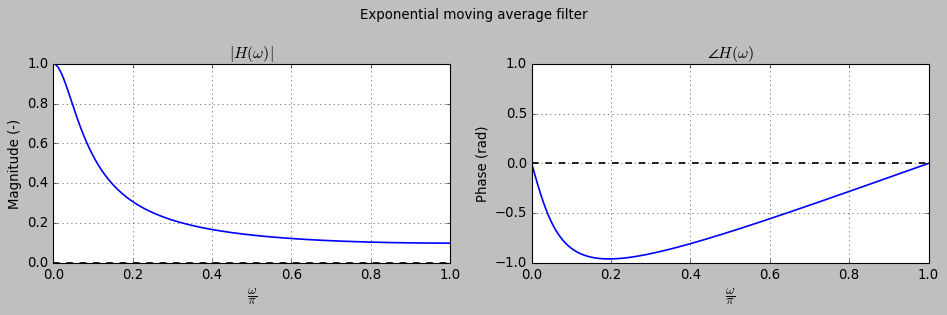

In [8]:
# Compute and visualize frequency response of an exponential moving average filter

def filt_IIRMA(L, T_s):
    tau = L*T_s
    alpha = np.exp(-T_s / tau)
    b = np.array([1 - alpha])
    a = np.array([1, -alpha])
    return b, a

b_IIRMA, a_IIRMA = filt_IIRMA(5, 1/4096)

N_point = 4096
fr_IIRMA, ang_IIRMA = calcFreqResponse(b_IIRMA, a_IIRMA, N_point)
ang_IIRMA /= np.pi  # Normalizing with respect to pi

"""
Plotting
"""
lw = 1.5
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
fig_ylabels = ['Magnitude (-)', 'Phase (rad)']
fig_titles = [r'$|H(\omega)|$', r'$\angle H(\omega)$']
ax[0].plot(ang_IIRMA, abs(fr_IIRMA), linewidth=lw)
ax[1].plot(ang_IIRMA, np.angle(fr_IIRMA), linewidth=lw)
fig.suptitle('Exponential moving average filter')
for i in range(0, 2):
    ax[i].set_xlabel('$\dfrac{\omega}{\pi}$')
    ax[i].set_ylabel(fig_ylabels[i])
    ax[i].set_title(fig_titles[i])
    ax[i].axhline(0, color='k', linestyle='--', linewidth=lw)
    ax[i].set_xlim([0, 1])
    ax[i].grid(which='both')
fig.tight_layout()

### 3. Data smoothing with IIR and FIR filters
The effect of a filter's linearity in phase response can either be a serious or trivial thing to consider: it all depends on the filter's use-case.

We shall begin by preparing a couple of noisy versions of the above output $y$ of **Case 1** and try to smooth it with a group of FIR and IIR filters.

**Example 1: Signal corrupted by high frequency noise**

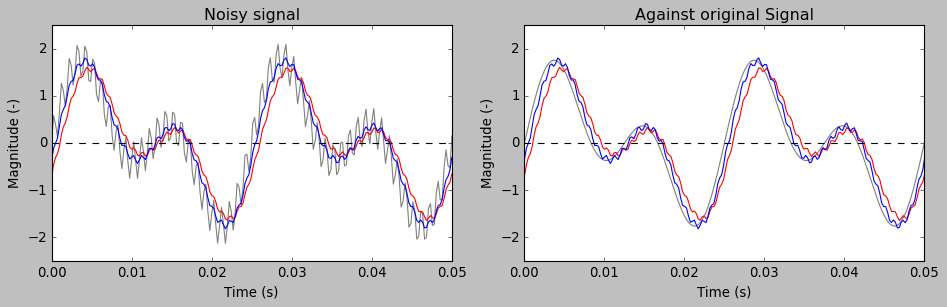

In [9]:
f_noise = 1000  # 1 kHz high frequency interference
x_noise_HF, _ = generateSinusoid(0.4, f_noise, T, 0)
y_noise_HF  = y_case_1 + x_noise_HF
Y_noise_HF = fft(y_noise_HF)

# Smooth with IIR
Y_smooth_IIR = Y_noise_HF * fr_IIRMA
y_smooth_IIR = np.real(ifft(Y_smooth_IIR))

# Smooth with FIR
Y_smooth_FIR = Y_noise_HF * fr_FIRMA
y_smooth_FIR = np.real(ifft(Y_smooth_FIR))

"""
Plotting
"""
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
fig_titles = ['Noisy signal', 'Against original Signal']

for i in range(0, 2):
    if i == 0:
        ax[i].plot(t1, y_noise_HF, color='grey')
    else:
        ax[i].plot(t1, y_case_1 ,color='grey')
    ax[i].plot(t1, y_smooth_IIR, color='red')
    ax[i].plot(t1, y_smooth_FIR, color='blue')
    ax[i].axhline(0, color='k', linestyle='--')
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Magnitude (-)')
    ax[i].set_title(fig_titles[i])
    ax[i].set_xlim([0, 0.05])
    ax[i].set_ylim([-2.5, 2.5])
fig.tight_layout()

**Example 2: Signal corrupted by random noise**

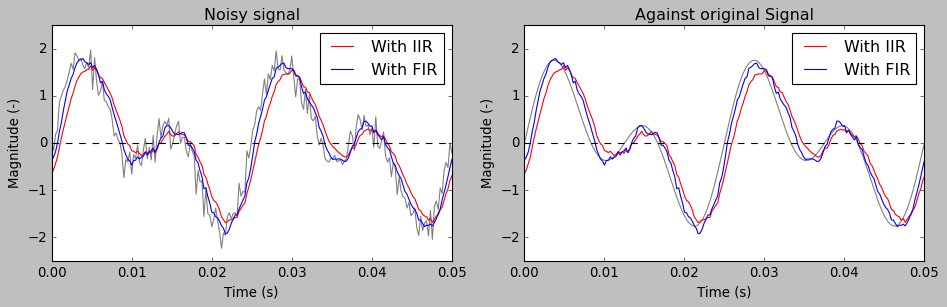

In [10]:
x_noise_rand = 0.2*np.random.randn(len(y_case_2))
y_noise_rand = y_case_1 + x_noise_rand
Y_noise_rand = fft(y_noise_rand)

# Smooth with IIR
Y_smooth_IIR = Y_noise_rand * fr_IIRMA
y_smooth_IIR = np.real(ifft(Y_smooth_IIR))

# Smooth with FIR
Y_smooth_FIR = Y_noise_rand * fr_FIRMA
y_smooth_FIR = np.real(ifft(Y_smooth_FIR))

"""
Plotting
"""
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
fig_titles = ['Noisy signal', 'Against original Signal']

for i in range(0, 2):
    if i == 0:
        ax[i].plot(t1, y_noise_rand, color='grey')
    else:
        ax[i].plot(t1, y_case_1 ,color='grey')
        
    ax[i].plot(t1, y_smooth_IIR, color='red', label='With IIR')
    ax[i].plot(t1, y_smooth_FIR, color='blue', label='With FIR')
    ax[i].axhline(0, color='k', linestyle='--')
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Magnitude (-)')
    ax[i].set_title(fig_titles[i])
    ax[i].set_xlim([0, 0.05])
    ax[i].set_ylim([-2.5, 2.5])
    ax[i].legend()

fig.tight_layout()

The benefits of having linear phase is not observed in such an example. This is to emphasize that it is not always a requirement in filter design to have linear phase. In contrast, the following section will showcase the benefits of using filters with linear phase.

### 4. Noise filtering with IIR and FIR filters
We shall start by preparing a two-tone sinusoid signal and inject a band limited noise within the two tones. In this example, a signal containing both 10 Hz and 20 Hz sinusoids is sampled at 100 Hz.

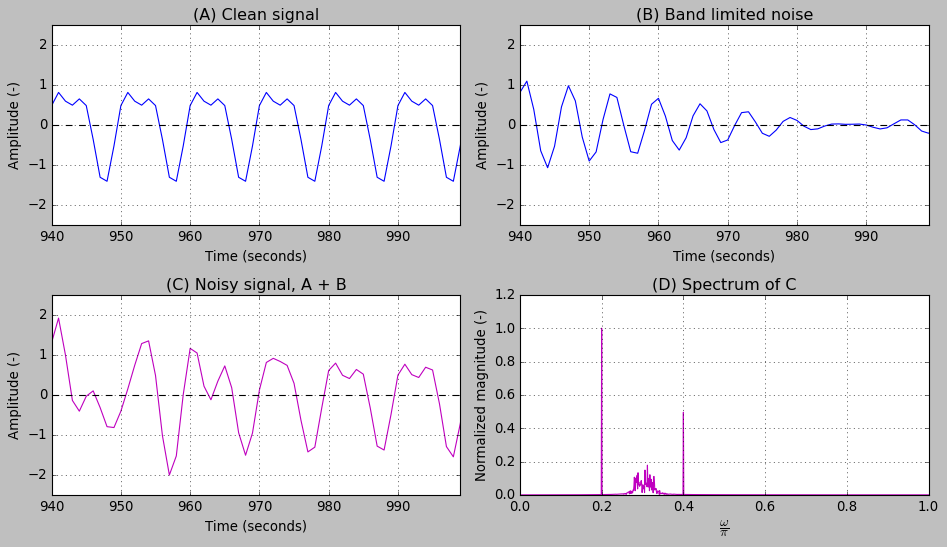

In [11]:
F_s = 100                # sampling frequency
T_s = 1 / F_s            # sampling interval
N = 2000                 # length of signal being synthesized
n = np.arange(0, N)      # samples of the signal
t = n * T_s

# Synthesize a signal (10 Hz and 20 Hz. The 20 Hz signal contains a phase delay of 1.4 rads)
x = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t + 1.4) 

# Generate some random noise
ns = np.random.randn(len(x))*2

# Generate a Bandpass (BP) filter
b, a = sig.butter(5, [0.28, 0.33], 'bandpass')  # 0.28 and 0.33 represent the normalized corner frequencies of the BP filter.

# Filter the noise to generated band limited noise
ns_filtered = sig.lfilter(b, a, ns)

# Add band limited noise to original signal
x_ns = x + ns_filtered

# Compute DFT of noisy signal
X_ns = fft(x_ns)
f_ax = np.arange(0, N) / (N/2)  # normalized frequency axis

"""
Plotting
"""
plot_range = (np.arange(int(N/2) - 60, int(N/2)))  # Restrict signal bounds for plotting
plot_titles = [['(A) Clean signal', '(B) Band limited noise'],
               ['(C) Noisy signal, A + B', '(D) Spectrum of C']]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
ax[0, 0].plot(n, x, color='b', label='Clean signal')
ax[0, 1].plot(n, ns_filtered)

ax[1, 0].plot(n, x_ns, color='m')
ax[1, 1].plot(f_ax, abs(X_ns) / (N/2), color='m')

for i in range(0, 2):
    for j in range(0, 2):
        ax[i, j].grid(which='both')
        ax[i, j].set_title(plot_titles[i][j])
        if (i == 1) and (j == 1):
            ax[i, j].set_xlabel(r"$\dfrac{\omega}{\pi}$")
            ax[i, j].set_ylabel('Normalized magnitude (-)')
            ax[i, j].set_xlim([0, f_ax[int(N/2)]])
        else:
            ax[i, j].axhline(0, color='k', linestyle='--')
            ax[i, j].set_xlim([plot_range[0], plot_range[-1]])
            ax[i, j].set_ylim([-max(abs(x_ns)), max(abs(x_ns))])
            ax[i, j].set_ylabel('Amplitude (-)')
            ax[i, j].set_xlabel('Time (seconds)')
            
fig.tight_layout()

**Case 1** : Noise filtering with **FIR** Filters.
A linear phase filter with 99-tap (or filter length) is used. The filter order is 98.

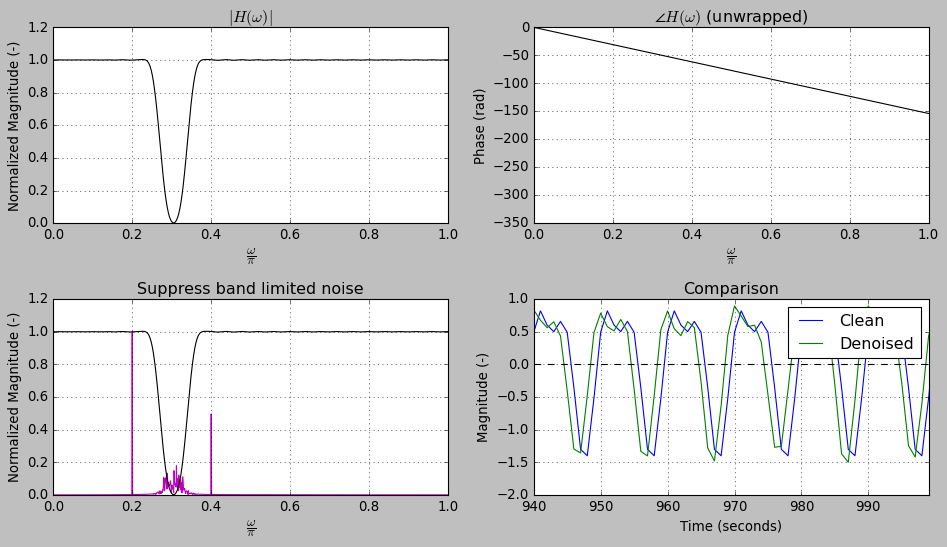

In [12]:
b_linfil = sig.firwin(99, [0.27, 0.34])
a_linfil = np.asarray([1]);
y_linfil = sig.lfilter(b_linfil,a_linfil, x_ns);

N_point = 48000
fr_linfil, ang_linfil = calcFreqResponse(b_linfil, a_linfil, N_point)
ang_linfil /= np.pi  # Normalizing with respect to pi

"""
Plotting
"""
plot_titles = [[r'$|H(\omega)|$', r'$\angle H(\omega)$ (unwrapped)'],
               ['Suppress band limited noise', 'Comparison']]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
ax[0, 0].plot(ang_linfil, abs(fr_linfil), color='k')
ax[0, 1].plot(ang_linfil, np.unwrap(np.angle(fr_linfil)), color='k')

ax[1, 0].plot(f_ax, np.abs(X_ns) / (N/2), color='m', label='Noisy signal')
ax[1, 0].plot(ang_linfil, abs(fr_linfil), color='k', label='Filter')

ax[1, 1].plot(n, x, label='Clean', color='b')
ax[1, 1].plot(n, y_linfil, label='Denoised', color='g')
ax[1, 1].legend()

for i in range(0, 2):
    for j in range(0, 2):
        ax[i, j].set_title(plot_titles[i][j])
        ax[i, j].grid(which='both')
        if (i == 1) and (j == 1):
            ax[i, j].set_xlim([plot_range[0], plot_range[-1]])
            ax[i, j].set_xlabel('Time (seconds)')
            ax[i, j].set_ylabel('Magnitude (-)')
            ax[i, j].axhline(0, color='k', linestyle='--')
        else:
            ax[i, j].set_xlim([0, f_ax[int(N/2)]])
            ax[i, j].set_xlabel(r"$\dfrac{\omega}{\pi}$")
            ax[i, j].set_ylabel('Normalized Magnitude (-)')
ax[0, 1].set_ylabel('Phase (rad)')            
fig.tight_layout()

**Case 2**: Noise filtering with **IIR** Filters
A non-linear phase IIR filter is used with filter order = 10.

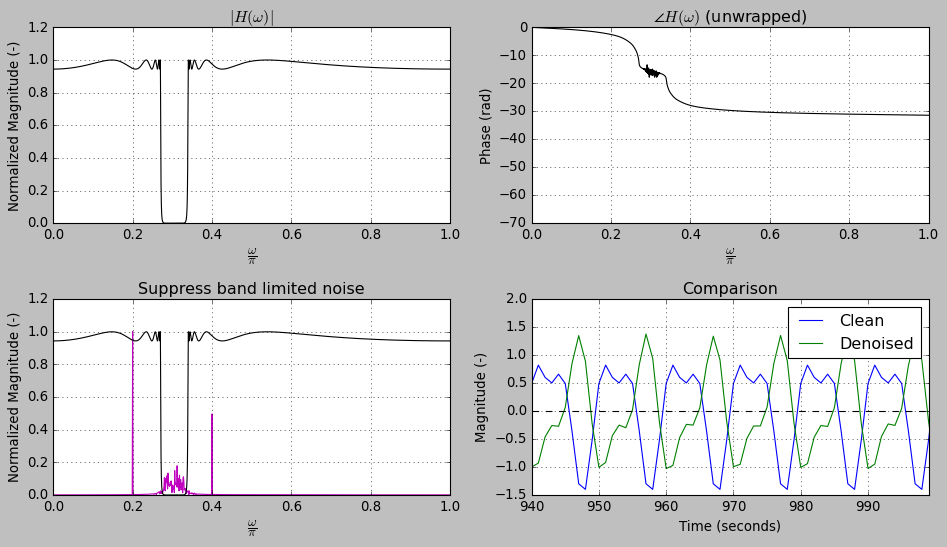

In [13]:
[b_cheby, a_cheby] = sig.cheby1(10, 0.5, [0.27, 0.34], 'bandstop')
y_cheby = sig.lfilter(b_cheby, a_cheby, x_ns)

N_point = 48000
fr_cheby, ang_cheby = calcFreqResponse(b_cheby, a_cheby, N_point)
ang_cheby /= np.pi  # Normalizing with respect to pi

"""
Plotting
"""
plot_titles = [[r'$|H(\omega)|$', r'$\angle H(\omega)$ (unwrapped)'],
               ['Suppress band limited noise', 'Comparison']]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
ax[0, 0].plot(ang_cheby, abs(fr_cheby), color='k')
ax[0, 1].plot(ang_cheby, np.unwrap(np.angle(fr_cheby)), color='k')

ax[1, 0].plot(f_ax, np.abs(X_ns) / (N/2), color='m', label='Noisy signal')
ax[1, 0].plot(ang_cheby, abs(fr_cheby), color='k', label='Filter')

ax[1, 1].plot(n, x, label='Clean', color='b')
ax[1, 1].plot(n, y_cheby, label='Denoised', color='g')
ax[1, 1].legend()

for i in range(0, 2):
    for j in range(0, 2):
        ax[i, j].set_title(plot_titles[i][j])
        ax[i, j].grid(which='both')
        if (i == 1) and (j == 1):
            ax[i, j].set_xlim([plot_range[0], plot_range[-1]])
            ax[i, j].set_xlabel('Time (seconds)')
            ax[i, j].set_ylabel('Magnitude (-)')
            ax[i, j].axhline(0, color='k', linestyle='--')
        else:
            ax[i, j].set_xlim([0, f_ax[int(N/2)]])
            ax[i, j].set_xlabel(r"$\dfrac{\omega}{\pi}$")
            ax[i, j].set_ylabel('Normalized Magnitude (-)')
ax[0, 1].set_ylabel('Phase (rad)')               
fig.tight_layout()

In **Case 1**, it can be seen that a linear phase filter preserves the shape, wherein denoising the noisy signal did not cause the filtered waveform to change its shape when compared to the input. It merely added a fixed delay in the output. Depending on the requirements, this delay can be corrected easily.


In contrast, **Case 2** demonstrates that the non-linear phase filter denoised the noisy signal but failed to preserve the input waveform's shape.

**<p style="color:green">Phase response of a filter can have serious consequences on the intended application. As an example, a doctor trying to interpet denoised cardiograms with a non-linear phase filter may erroneously diagnose the patient with a heart disease because of observed "irregularities" in the heart-beat patterns.</p>**